Mean Squared Error: 3.481349830511854
R-squared Score: 0.8488707839193138


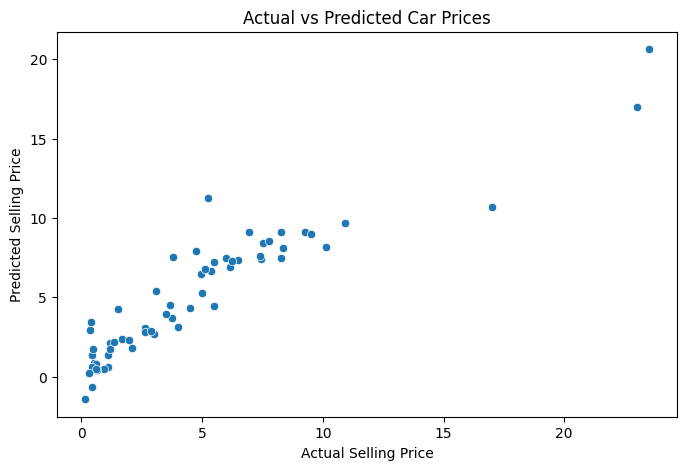

In [5]:
# Task 3: Car Price Prediction with Machine Learning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv(r"C:\Iris-Classification\car data.csv")

# 2. Define features (X) and target (y)
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']

# 3. Preprocessing: Encode categorical variables and scale numeric ones
numeric_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 4. Create pipeline with preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 5. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the model
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# 9. Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
